###DSCI551 Lab1: Vertebral Column Dataset 

**Name: Cheng Peng,
USC ID: 6898-9638-37**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
pd.version()

##Part a):

In [2]:
columns = ["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle","Sacral Slope", "Pelvic Radius", "Grade of Spondylolisthesis", "Labels"]
path = "/content/drive/My Drive/DSCI552: Course Material/Homework 1 Data/vertebral_column_data/column_2C.dat"
df = pd.read_table(path, header=None, sep = '\s+', names = columns)


FileNotFoundError: ignored

In [ ]:
df.head()

##Part b):


i: Scatter plot of the independent variables

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


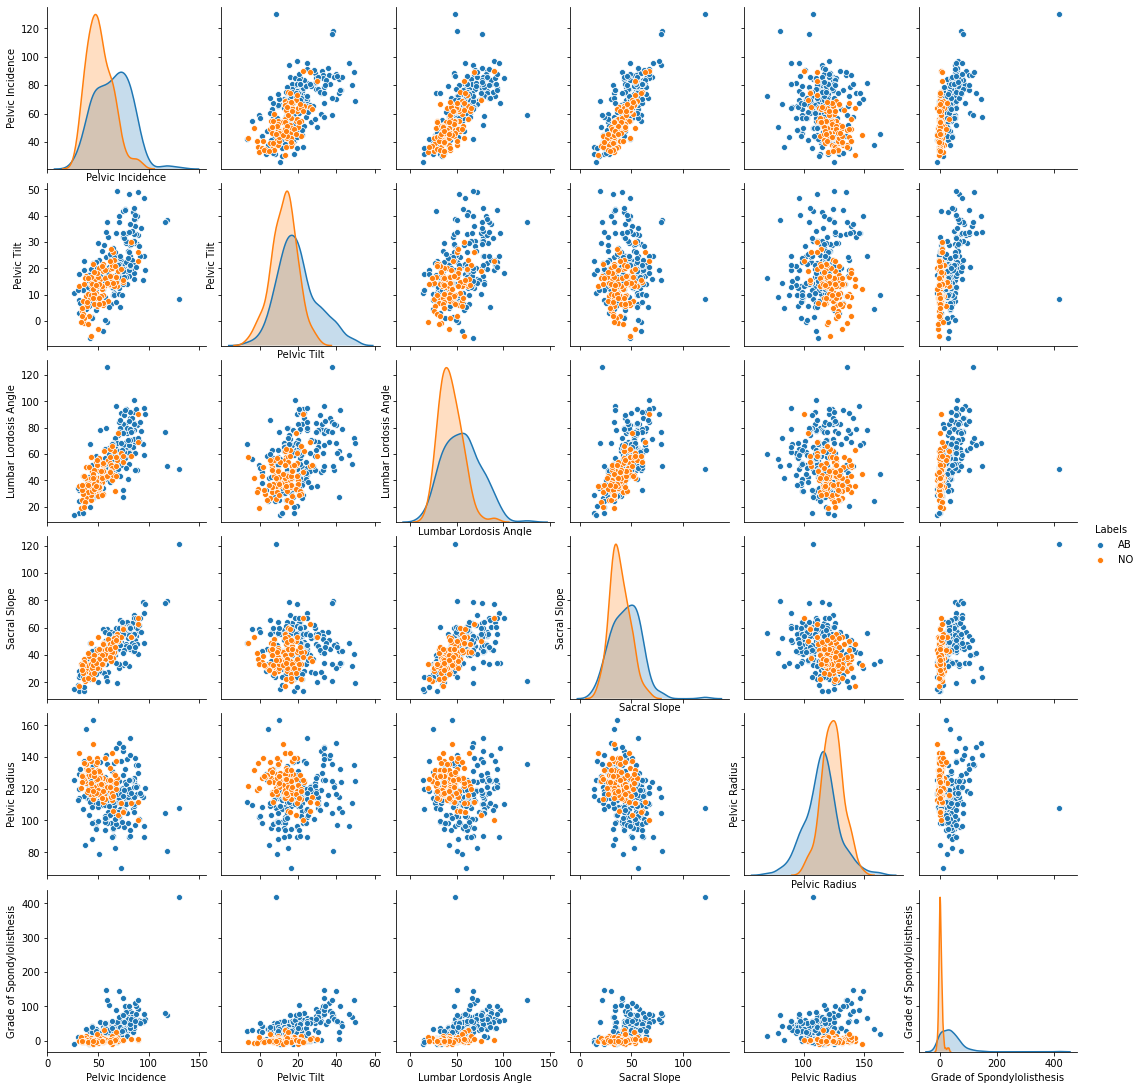

In [ ]:
import seaborn as sns 
from pandas.testing import assert_frame_equal
import pandas.util.testing as tm


scatter_plot = sns.pairplot(df, hue = "Labels" )
attributes = ["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle","Sacral Slope", "Pelvic Radius", "Grade of Spondylolisthesis"]
scatter_plot._legend.set_title("Labels")
for i in range (6):
  for j in range (6):
    scatter_plot.axes[i,j].xaxis.set_label_text(attributes[j])
    scatter_plot.axes[i,j].yaxis.set_label_text(attributes[i])
plt.show()

ii: box plots of each independent variable 

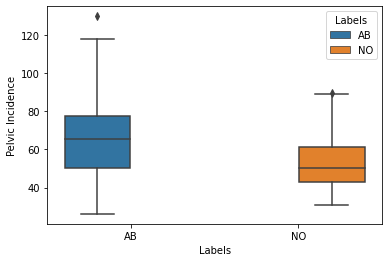

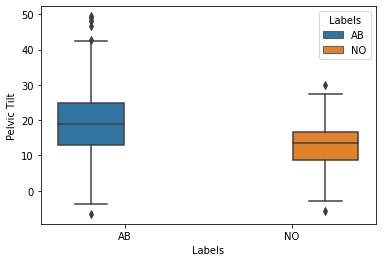

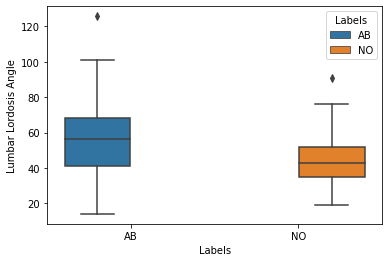

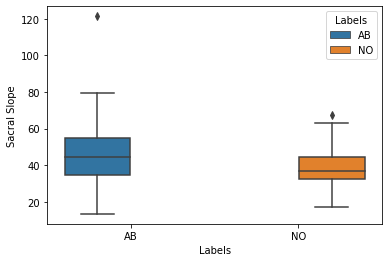

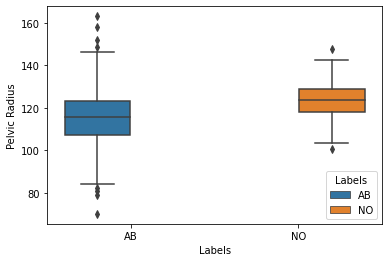

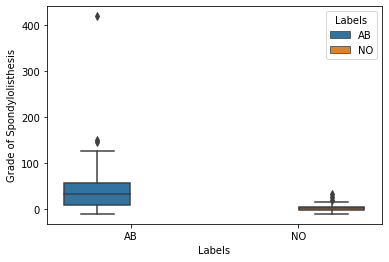

In [ ]:
for i in range(6):
  p = sns.boxplot(data = df, x = "Labels", y = columns[i], hue = "Labels")
  plt.show()

In [ ]:
# convert NO ->0 and AB ->1
df["Labels"] = df["Labels"].apply(lambda x: 0 if x == "NO" else 1)

iii: training and test set split 

In [ ]:
training_set = df[df["Labels"]==0][0:70].append(df[df["Labels"]==1][0:140])
test_set = df[df["Labels"]==0][70:].append(df[df["Labels"]==1][140:])

##Part C: Classification using KNN on Vertebral Column Dataset 

i: Euclidean distance 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def knnEuclidean(X_train, y_train, X_test, y_test, k):
  knn = KNeighborsClassifier(k, metric="euclidean").fit(X_train, y_train)
  train_accuracy = accuracy_score(y_train, knn.predict(X_train))
  test_accuracy = accuracy_score(y_test, knn.predict(X_test))
  return knn, train_accuracy, test_accuracy


In [ ]:
X_train = training_set[columns[0:6]]
y_train = training_set["Labels"]
X_test= test_set[columns[0:6]]
y_test = test_set["Labels"]


In [ ]:
# use the trained model to predict the testingset 
knn, train_accuracy, test_accuracy = knnEuclidean(X_train, y_train, X_test, y_test,3)
print("K = {}: training accuracy {:.4f} | test accuracy {:.4f}".format(3, train_accuracy, test_accuracy))

K = 3: training accuracy 0.8952 | test accuracy 0.9200


ii: KNN with Majority Polling, k = [208, 205, ..., 7, 4, 1]

In [ ]:
train_acc = []
test_acc = []
index = []
for k in range (208, 0, -3):
  _, train_accuracy, test_accuracy = knnEuclidean(X_train, y_train, X_test, y_test, k)
  index.append(k)
  train_acc.append(train_accuracy)
  test_acc.append(test_accuracy)


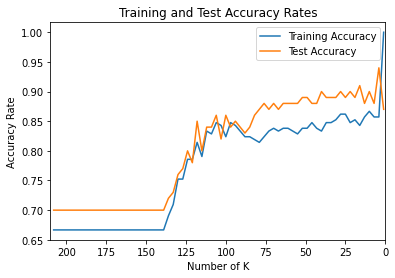

In [ ]:
plt.plot(index, train_acc, label = "Training Accuracy")
plt.plot(index, test_acc, label = "Test Accuracy")
plt.title("Training and Test Accuracy Rates")
plt.xlabel("Number of K")
plt.ylabel("Accuracy Rate")
plt.legend(loc='best')
plt.xlim((210,0))
plt.show()

Text(0, 0.5, 'Error')

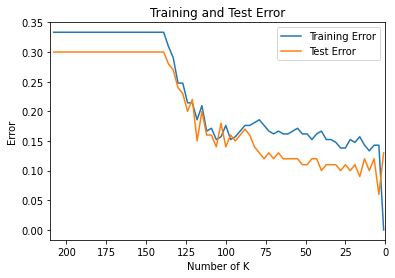

In [ ]:
plt.plot(index, [1-x for x in train_acc], label="Training Error")
plt.plot(index, [1-x for x in test_acc], label = "Test Error")
plt.legend(loc='best')
plt.title("Training and Test Error")
plt.xlim((210,0))
plt.xlabel("Number of K")
plt.ylabel("Error")

k* is the k value when the test error is the lowest, in another word, test accuracy rate is the highest 

In [ ]:
import numpy as np
k_star = index[np.argmax(test_acc)]
print("K* is {}".format(k_star))

K* is 4


Calculate the confusion matrix, true positive rate, true negative rate, precision and F1 score at k = k*

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score

knn_k_star, _, _ = knnEuclidean(X_train, y_train, X_test, y_test, k_star)
prediction = knn_k_star.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
precision = precision_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

In [ ]:
print("K = 4: true positive rate {}| true negative rate {}| precision score {:.4f}| F1 score {:.4f}".format(
    confusion[0][0], confusion[1][1], precision, f1
))

K = 4: true positive rate 25| true negative rate 69| precision score 0.9324| F1 score 0.9583


iii: Test Error Rate against different size of training set 

In [ ]:
X_train

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis
210,38.51,16.96,35.11,21.54,127.63,7.99
211,54.92,18.97,51.60,35.95,125.85,2.00
212,44.36,8.95,46.90,35.42,129.22,4.99
213,48.32,17.45,48.00,30.87,128.98,-0.91
214,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09
136,88.02,39.84,81.77,48.18,116.60,56.77
137,83.40,34.31,78.42,49.09,110.47,49.67
138,72.05,24.70,79.87,47.35,107.17,56.43


In [ ]:
n=28
sub_X_train = X_train[0:n//3].append(X_train[70:70+(n-n//3)])

In [ ]:
sub_X_train.shape

(28, 6)

In [ ]:

sub_size = []
optimal_train_acc = []
optimal_test_acc = []

for n in range (10, 220, 10):
  sub_size.append(n)
  sub_X_train = X_train[0:n//3].append(X_train[70:70+(n-n//3)])
  sub_y_train = y_train[0:n//3].append(y_train[70:70+(n-n//3)])
  train_acc = []
  test_acc = []
  for k in range (1, n, 5):
    knn, train_acc_rate, test_acc_rate = knnEuclidean(sub_X_train, sub_y_train, X_test, y_test, k)
    train_acc.append(train_acc_rate)
    test_acc.append(test_acc_rate)
  optimal_k = np.argmax(test_acc)
  optimal_train_acc.append(train_acc[optimal_k])
  optimal_test_acc.append(test_acc[optimal_k])
  print("N = {}: optimal k {}| training accuracy {:.4f} |test accuracy {:.4f}".format(n, optimal_k, optimal_train_acc[-1], optimal_test_acc[-1]))

  

N = 10: optimal k 0| training accuracy 1.0000 |test accuracy 0.7500
N = 20: optimal k 1| training accuracy 0.8500 |test accuracy 0.8000
N = 30: optimal k 0| training accuracy 1.0000 |test accuracy 0.7800
N = 40: optimal k 2| training accuracy 0.8000 |test accuracy 0.7500
N = 50: optimal k 5| training accuracy 0.6800 |test accuracy 0.7000
N = 60: optimal k 4| training accuracy 0.7333 |test accuracy 0.7100
N = 70: optimal k 5| training accuracy 0.7286 |test accuracy 0.7100
N = 80: optimal k 6| training accuracy 0.7000 |test accuracy 0.7100
N = 90: optimal k 8| training accuracy 0.7000 |test accuracy 0.7100
N = 100: optimal k 1| training accuracy 0.8200 |test accuracy 0.7500
N = 110: optimal k 1| training accuracy 0.8091 |test accuracy 0.7800
N = 120: optimal k 3| training accuracy 0.8083 |test accuracy 0.8300
N = 130: optimal k 3| training accuracy 0.8154 |test accuracy 0.8400
N = 140: optimal k 3| training accuracy 0.8143 |test accuracy 0.8500
N = 150: optimal k 3| training accuracy 0.8

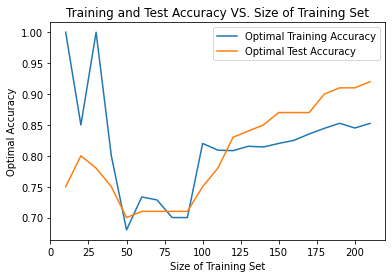

In [ ]:
plt.plot(sub_size,optimal_train_acc, label = "Optimal Training Accuracy")
plt.plot(sub_size, optimal_test_acc, label = "Optimal Test Accuracy")
plt.title("Training and Test Accuracy VS. Size of Training Set")
plt.legend(loc='best')
plt.xlabel("Size of Training Set")
plt.ylabel("Optimal Accuracy")
plt.show()

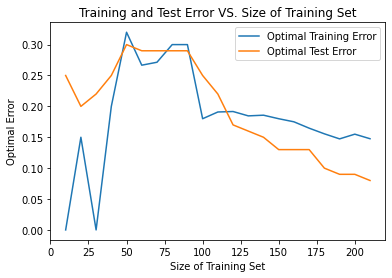

In [ ]:
plt.plot(sub_size,[1-x for x in optimal_train_acc], label = "Optimal Training Error")
plt.plot(sub_size, [1-x for x in optimal_test_acc], label = "Optimal Test Error")
plt.title("Training and Test Error VS. Size of Training Set")
plt.legend(loc='best')
plt.xlabel("Size of Training Set")
plt.ylabel("Optimal Error")
plt.show()

##Part D: Distance Metric 

i: Minkowski Distance 

In [ ]:
def knnMinko(X_train, y_train, X_test, y_test, k, p):
  knn = KNeighborsClassifier(n_neighbors = k, p=p, metric = "minkowski").fit(X_train, y_train)
  train_acc = accuracy_score(y_train, knn.predict(X_train))
  test_acc = accuracy_score(y_test, knn.predict(X_test))
  return knn, train_acc, test_acc


Case A: P=1 -> Manhattan Distance 

In [ ]:
train_acc = []
test_acc = []
k_value = []
for k in range(1, 200, 5):
  k_value.append(k)
  knn, train_acc_rate, test_acc_rate = knnMinko(X_train, y_train, X_test, y_test, k, p=1)
  train_acc.append(train_acc_rate)
  test_acc.append(test_acc_rate)

k_optimal = np.argmax(test_acc)
print("When p=1, the optimal K = {}, training accuracy: {:.4f}, test accuracy: {:.4f}".format(
      k_value[k_optimal], train_acc[k_optimal], test_acc[k_optimal]))
  

When p=1, the optimal K = 6, training accuracy: 0.8619, test accuracy: 0.8900


Case B: log10(p)->{0.1, 0.2, ..., 1}


In [ ]:
k_optimal = 6
p_values = np.linspace(0.1, 1, 10)
train_acc = []
test_acc=[]

for j in range(len(p_values)):
  knn, train_acc_rate, test_acc_rate = knnMinko(X_train, y_train, X_test, y_test, k_optimal, 10**p_values[j])
  train_acc.append(train_acc_rate)
  test_acc.append(test_acc_rate)

optimal_p = p_values[np.argmax(test_acc)]
print("The optimal P value is {:.4f}, log10(p*)={}, training accuracy rate: {:.4f}, test accuracy rate: {:.4f}".format(
    10**optimal_p, optimal_p, train_acc[np.argmax(test_acc)], test_acc[np.argmax(test_acc)]))


The optimal P value is 3.9811, log10(p*)=0.6, training accuracy rate: 0.8476, test accuracy rate: 0.9400


Case C: P-> ∞ -> Chebyshev Distance 




In [ ]:
training_acc = []
test_acc = []
k_values =[]

for k in range(1, 200, 5):
  knn = KNeighborsClassifier(k, metric="chebyshev").fit(X_train, y_train)
  training_acc_rate = accuracy_score(y_train, knn.predict(X_train))
  test_acc_rate = accuracy_score(y_test, knn.predict(X_test))
  training_acc.append(train_acc_rate)
  test_acc.append(test_acc_rate)
  k_values.append(k)

optimal_index = np.argmax(test_acc)
    
print("Using Chebyshev distance, the optimal K* = {}, training accuracy rate: {:.4f}, test accuracy rate: {:.4f}".format(
    k_values[optimal_index], training_acc[optimal_index], test_acc[optimal_index]))

Using Chebyshev distance, the optimal K* = 16, training accuracy rate: 0.8667, test accuracy rate: 0.9200


ii Mahalanobis Distance 

In [ ]:
training_acc = []
test_acc = []
k_values =[]

for k in range(1, 200, 5):
  knn = KNeighborsClassifier(k, metric="mahalanobis", algorithm='brute',metric_params = {'V': np.cov(X_train)}).fit(X_train, y_train)
  training_acc_rate = accuracy_score(y_train, knn.predict(X_train))
  test_acc_rate = accuracy_score(y_test, knn.predict(X_test))
  training_acc.append(training_acc_rate)
  test_acc.append(test_acc_rate)
  k_values.append(k)

optimal_index = np.argmax(test_acc)
    
print("Using Mahalanobis distance, the optimal K* = {}, training accuracy rate: {:.4f}, test accuracy rate: {:.4f}".format(
    k_values[optimal_index], training_acc[optimal_index], test_acc[optimal_index]))

Using Mahalanobis distance, the optimal K* = 6, training accuracy rate: 0.8810, test accuracy rate: 0.8400


##Part E: Weighted Dicision 

In [ ]:
distance = ["euclidean", "manhattan", "chebyshev"]
training_acc_table = []
test_acc_table = []
k_values = []

for i in range(len(distance)):
  training_acc = []
  test_acc = []
  k_values = []
  for k in range(1, 200, 5):
    knn = KNeighborsClassifier(k, metric=distance[i], weights='distance').fit(X_train, y_train)
    training_acc_rate = accuracy_score(y_train, knn.predict(X_train))
    test_acc_rate = accuracy_score(y_test, knn.predict(X_test))
    training_acc.append(training_acc_rate)
    test_acc.append(test_acc_rate)
    k_values.append(k)
  training_acc_table.append(training_acc)
  test_acc_table.append(test_acc)
  optimal_index = np.argmax(test_acc)

  print("Using weighted "+distance[i]+" distance, the optimal K* = {}, training accuracy rate: {:.4f}, test accuracy rate: {:.4f}".format(
      k_values[optimal_index], training_acc[optimal_index], test_acc[optimal_index]
  ))



Using weighted euclidean distance, the optimal K* = 6, training accuracy rate: 1.0000, test accuracy rate: 0.9000
Using weighted manhattan distance, the optimal K* = 26, training accuracy rate: 1.0000, test accuracy rate: 0.9000
Using weighted chebyshev distance, the optimal K* = 16, training accuracy rate: 1.0000, test accuracy rate: 0.8900


##Part F: Lowest Training Error

Lowest training error is 0, when you set k=1, the cloest neighbor is the training data point itself, thus the model can achieve 0 training error. However, the model does not really "learn" the charistics of the training set rather memorize the data points. 